In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score as sil_score
from sklearn.metrics import balanced_accuracy_score, RocCurveDisplay, roc_curve, roc_auc_score
from sklearn.base import clone
from sklearn import metrics
import seaborn

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from collections import Counter
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [3]:
# Other imports for decision trees
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import io
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [4]:
df = pd.read_csv('sample-1-25.csv')
y_col, x_col = df.columns[0], df.columns[1::]


In [5]:
Counter(df[y_col])

Counter({0: 1987514, 1: 2490})

In [6]:
df_y = df[y_col]
df = pd.DataFrame(df[x_col])
df['FRD_IND'] = df_y
df

,APPRD_AUTHZN_CNT,AVG_DLY_AUTHZN_AMT,MRCH_CATG_CD,POS_ENTRY_MTHD_CD,RCURG_AUTHZN_IND,DISTANCE_FROM_HOME,ACCT_CURR_BAL,AUTHZN_AMT,AUTHZN_OUTSTD_AMT,PLSTC_ISU_DUR,FRD_IND
0,3,7,5812,90,0,0.000000,2498.21,15.52,94.28,805,0
1,1,6,5541,90,0,0.000000,88.88,46.56,56.31,68,0
2,4,0,5965,81,0,358.850300,1934.36,16.34,927.13,190,0
3,0,3,5542,90,0,4.293625,916.04,1.00,0.00,217,0
4,1,2,5814,90,0,509.830350,166.62,10.66,10.66,110,0
...,...,...,...,...,...,...,...,...,...,...,...
1989999,2,53,5812,90,0,1.627350,789.59,27.00,252.15,215,0
1990000,1,7,5812,90,0,0.000000,455.20,9.36,9.36,916,0
1990001,1,0,5942,81,0,2289.664800,2339.05,31.37,32.37,721,0
1990002,1,18,5814,90,0,14.187878,327.17,25.69,25.69,318,0


In [7]:
df.shape

(1990004, 11)

In [8]:
# Applying smote
# x_resampled, y_resampled = SMOTE(random_state=44).fit_resample(df[x_col], df[y_col])

# df = pd.DataFrame(x_resampled)
# df['FRD_IND'] = y_resampled
# df

In [9]:
x, y = df[df.columns[0:-2]], df[df.columns[-2::]]

In [10]:
y_total_data = []
ydata = []

In [11]:
# Need to run the following cell before the simulation

In [12]:
# init_df = df[df['Round'] == 0]
# x, y = init_df[init_df.columns[0:-2]], init_df[init_df.columns[-2::]]

x_tr, x_te, y_tr, y_te = train_test_split(x, y['FRD_IND'], random_state=42)

In [13]:
# Applying smote

x_tr, y_tr = SMOTE(random_state=44).fit_resample(x_tr, y_tr)



In [14]:
print(Counter(y_tr))
print(Counter(y_te))

Counter({0: 1490632, 1: 1490632})
Counter({0: 496882, 1: 619})


## Defense

C:\Users\juddc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logisitic Regression Accuracy:  0.7663220777445674


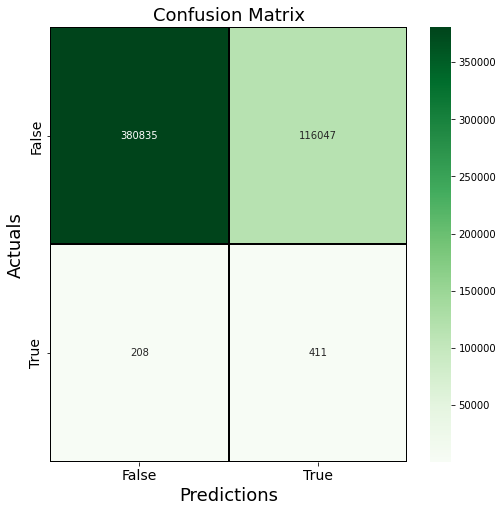

AUC Score:  0.7761865562305665


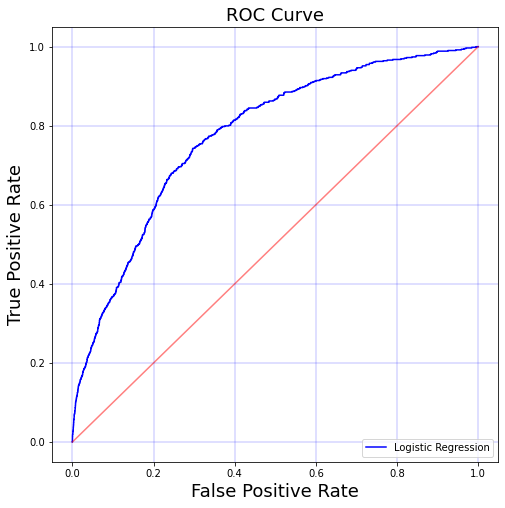

Random Forest Accuracy:  0.8736947262417563


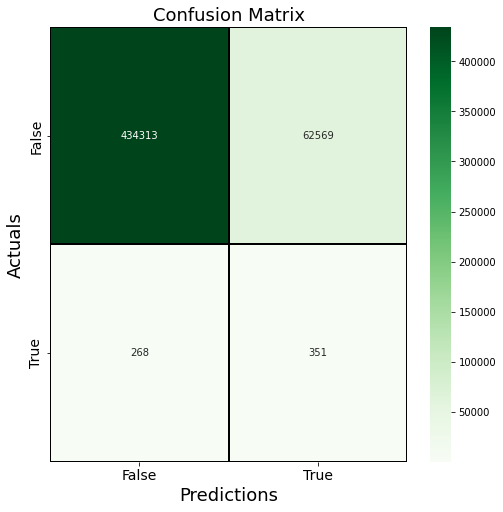

AUC Score:  0.8142072591498029


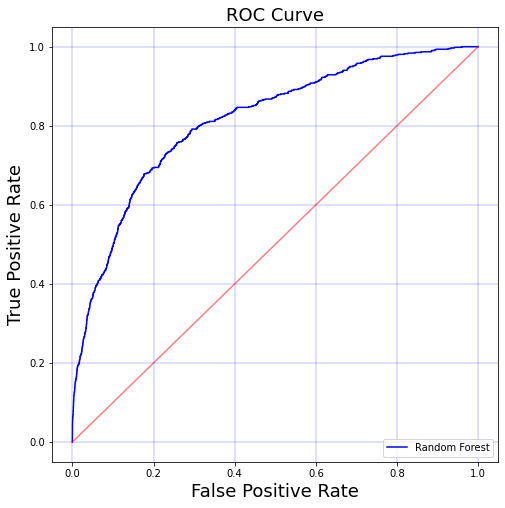

Decision Tree Accuracy:  0.8592907350939998


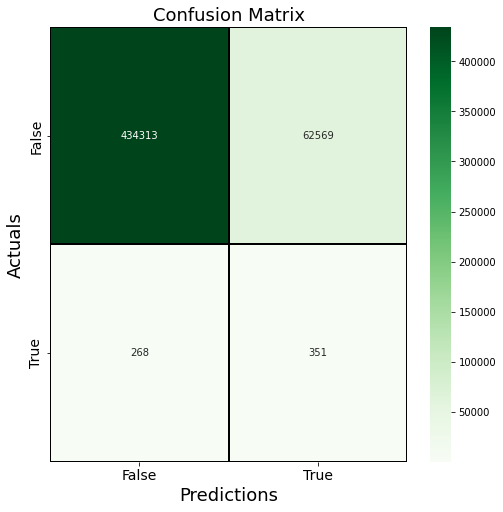

AUC Score:  0.7831888087067334


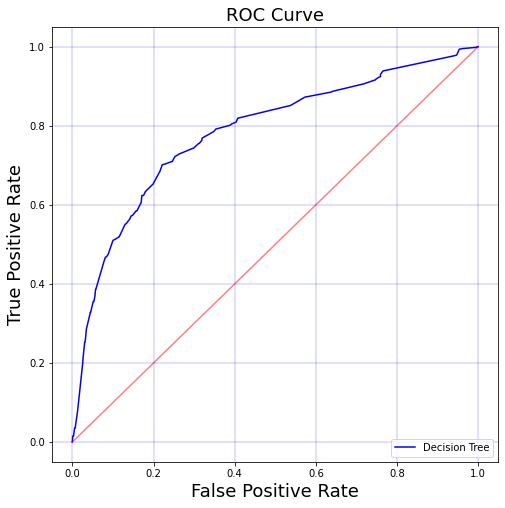

In [15]:
# Please train the classifiers here:
# Sidd Logistic Regression


# Confusion Matrix Function
def make_confusion_matrix(test, pred):
    conf_mat = confusion_matrix(test, pred)
    plt.figure(figsize=(8, 8))
    ax = seaborn.heatmap(conf_mat, annot=True,
        cmap=plt.cm.Greens, fmt='g', 
        linewidths=0.1, linecolor='black')
    ax.xaxis.set_ticklabels(['False', 'True'], fontsize=14)
    ax.yaxis.set_ticklabels(['False', 'True'], fontsize=14)
    ax.set_xlabel('Predictions', fontsize=18)
    ax.set_ylabel('Actuals', fontsize=18)
    ax.set_title('Confusion Matrix', fontsize=18)
    plt.show()

def make_roc_curve(model, label):
    pred_prob = model.predict_proba(x_te)[:,1]
    fpr1, tpr1, _a = roc_curve(y_te, pred_prob, pos_label=1)
    random_probs = [0 for i in range(len(y_te))]
    p_fpr, p_tpr, _b = roc_curve(y_te, random_probs, pos_label=1)
    auc_score = roc_auc_score(y_te, pred_prob)
    print("AUC Score: ", auc_score)
    plt.figure(figsize=(8, 8))
    plt.plot(fpr1, tpr1, color='blue', label=label)
    plt.plot(p_fpr, p_tpr, color='red', alpha=0.5)
    plt.title('ROC Curve', fontsize=18)
    plt.xlabel('False Positive Rate', fontsize=18)
    plt.ylabel('True Positive Rate', fontsize=18)
    plt.legend(bbox_to_anchor=(0, 0, 1, 1), loc='lower right')
    plt.grid(color='b', ls = '-', lw=0.25)
    plt.show()



# Sid Logistic Regression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_tr, y_tr)

logPreds = logisticRegr.predict(x_te)
print("Logisitic Regression Accuracy: ", metrics.accuracy_score(y_te, logPreds))
make_confusion_matrix(y_te, logPreds)

make_roc_curve(logisticRegr, "Logistic Regression")

# Judd Random Forest
forest = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=12)
forest.fit(x_tr, y_tr)

pred = forest.predict(x_te)
print("Random Forest Accuracy: ", metrics.accuracy_score(y_te, pred))
make_confusion_matrix(y_te, pred)

make_roc_curve(forest, "Random Forest")

#Matt's Decision Tree
dtree = DecisionTreeClassifier(max_depth = 20, max_leaf_nodes= 100)
dtree = dtree.fit(x_tr, y_tr) # Need to figure out which way to limit them.

DPred = dtree.predict(x_te)
print("Decision Tree Accuracy: ", metrics.accuracy_score(y_te, DPred))
make_confusion_matrix(y_te, pred)

make_roc_curve(dtree, "Decision Tree")




